#             **Language Detection Algorithm**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm , metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import chardet

In [ ]:
data = pd.read_csv('/content/drive/My Drive/dataset.csv') # import the csv file into a dataframe

In [ ]:
with open("/content/drive/My Drive/dataset.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# Check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


# Data Visualization

In [ ]:
data.head() #take a look at the the first 5 rows of the dataframe

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


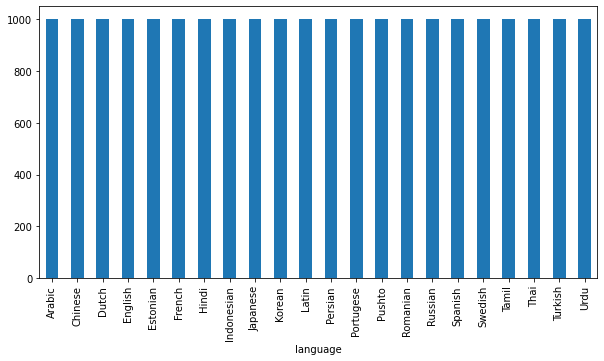

In [ ]:
# count the no. of occurences of each language and plot that no. in a bar plot
lang_counts = data.groupby('language').language.count() 
lang_counts.plot.bar(figsize=(10,5), fontsize=10)


# Data Cleaning

In [ ]:
# Leading and trailing whitespaces are removed
data['Text'] = [i.strip() for i in data['Text']]

# All letters are transformed into lowercase letters in a new column called 'ltext'
data['ltext'] = [i.lower() for i in data['Text']]

# Add a new column called len which contains the length of each sentence
data['len'] = [len(i) for i in data['ltext']]

# Drop all sentences that have a character count of less than 200
data = data.loc[data['len'] > 200]


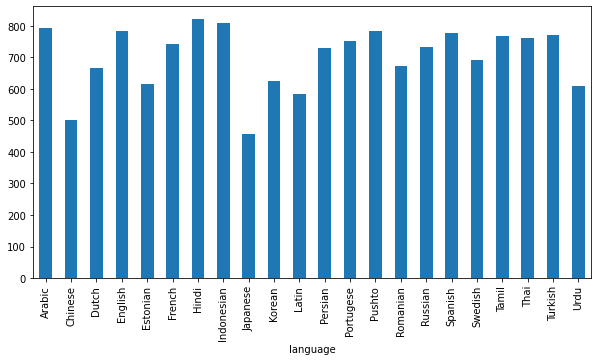

In [ ]:
lang_counts_clnd = data.groupby('language').language.count() 
lang_counts_clnd.plot.bar(figsize=(10,5), fontsize=10)

#Feature Extraction

In [ ]:
# Extract all the letters from the cleaned sentences
chars = ''.join({c for c in ''.join(data['ltext']) if c.isalpha()})

# Ratio of frequncy of each letter is calculated and each letter has its seperate series
for c in chars:
  data[c] = [r.count(c) for r in data['ltext']] / data['len']


In [ ]:
# Features DataFrame
f = pd.DataFrame()
features = list(chars)
f['language'] = data['language']
for x in features:
  f[x] = data[x]



In [ ]:
# Split dataset to training and testing 75/25
train, test = train_test_split(f,test_size=0.25)

In [ ]:
# Extracting the data and the  class labels (languages) into different variables 
# And shaping the data into an array for the model
x = np.array([np.array(row[1:]) for index, row in train.iterrows()])
y = np.array([l for l in train['language']])
X = np.array([np.array(row[1:]) for index, row in test.iterrows()])
Y = np.array([l for l in test['language']])

#                          Training Models

##**KNN**

In [ ]:
# Looping over K values from 1 to 15 to find the most suitable K
for i in range(1, 16):
  clf = KNeighborsClassifier(i)
  clf.fit(x, y)
  predictions = clf.predict(X)
  ratio_correct = len([i for i in range(len(Y)) if Y[i] == predictions[i]]) / len(Y)
  print(str(i), round(ratio_correct*100,3) ,'%')



1 96.813 %
2 96.788 %
3 97.254 %
4 97.073 %
5 97.124 %
6 97.15 %
7 97.332 %
8 97.228 %
9 97.28 %
10 97.176 %
11 97.124 %
12 97.228 %
13 97.254 %
14 97.098 %
15 97.124 %


In [ ]:
# K = 7 is the most suitable value with testing accuracy = 97.332%
K_opt = 7

In [ ]:
# Setting the model with the best paramater
clf = KNeighborsClassifier(K_opt)
clf.fit(x, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

###Metrics

In [ ]:
# Use the testing data to find predictions and calculate confusion matrix
preds = clf.predict(X)
conf_matrix = confusion_matrix(Y,preds)
#print(conf_matrix)

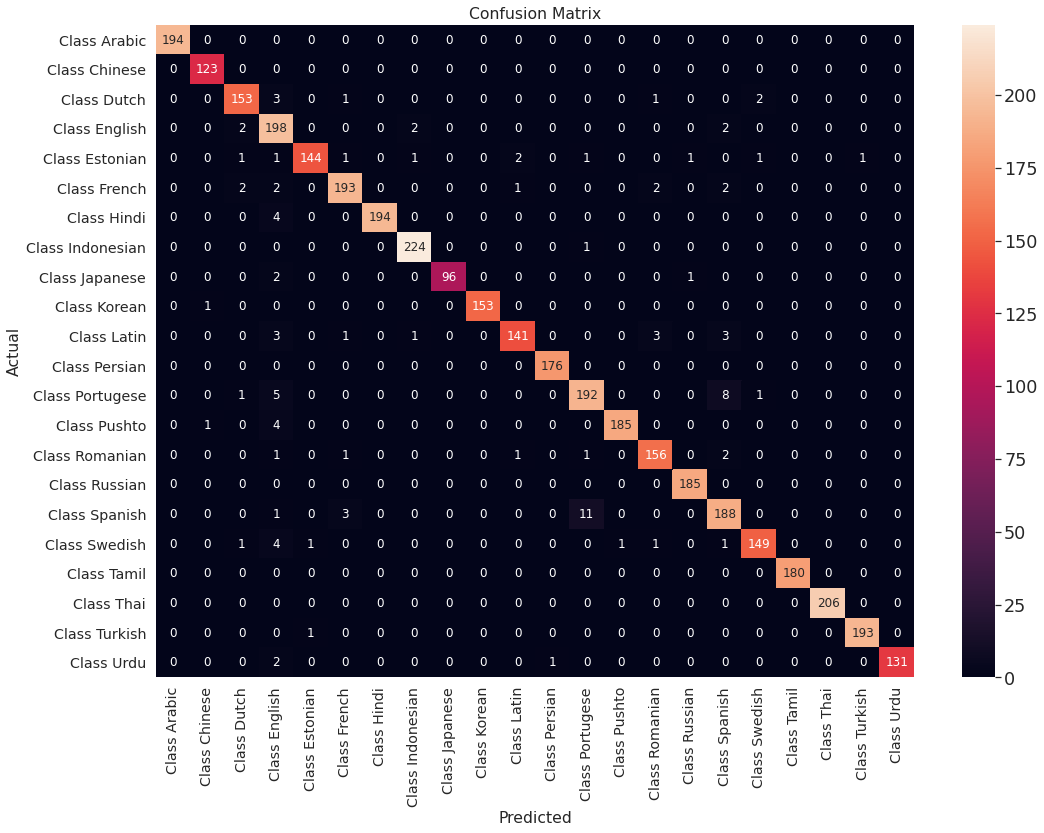

In [ ]:
# Plot confusion matrix for better understanding using seaborn heatmap
columns = ['Class %s' %(i[0]) for i in data.groupby('language').language.unique()]
conf_df = pd.DataFrame(conf_matrix, index=columns, columns=columns)


plt.figure(figsize=(17,12))
plt.title('Confusion Matrix')
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

sn.set(font_scale=1.6) # For label size
sn.heatmap(conf_df, annot=True, annot_kws={"size": 12}, fmt='0.0f') # Font size
plt.show()

In [ ]:
print(metrics.classification_report(Y,preds))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       194
     Chinese       0.98      1.00      0.99       123
       Dutch       0.96      0.96      0.96       160
     English       0.86      0.97      0.91       204
    Estonian       0.99      0.94      0.96       154
      French       0.96      0.96      0.96       202
       Hindi       1.00      0.98      0.99       198
  Indonesian       0.98      1.00      0.99       225
    Japanese       1.00      0.97      0.98        99
      Korean       1.00      0.99      1.00       154
       Latin       0.97      0.93      0.95       152
     Persian       0.99      1.00      1.00       176
   Portugese       0.93      0.93      0.93       207
      Pushto       0.99      0.97      0.98       190
    Romanian       0.96      0.96      0.96       162
     Russian       0.99      1.00      0.99       185
     Spanish       0.91      0.93      0.92       203
     Swedish       0.97    

##**SVM**

In [ ]:
# Training the SVM model from sklearn
model = svm.SVC(kernel='linear')
model.fit(x,y)
# Testing model and checking accuracy
predict = model.predict(X)
ratio_crct = len([i for i in range(len(Y)) if Y[i] == predict[i]]) / len(Y)


In [ ]:
print(round(ratio_crct*100,3),'%')

94.948 %


###Tuning the hyperparameters using GridSearch for better accuracy

In [ ]:
# Creating dict and giving values to the kernels c and gamma
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

In [ ]:
# Creating grid object and fitting the model
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


#Testing New Inputs

In [ ]:
inpt = str(input())
inpt_len = len(inpt)
freqs =[]
inpt = inpt.lower()

for x in features:
  freqs.append(inpt.count(x)/inpt_len)

extracted_feats = np.array(freqs)
print('\n')
print('The predicted language is: ',clf.predict(np.array([extracted_feats]))[0])

Toute personne a droit à l'éducation. L'éducation doit être gratuite, au moins en ce qui concerne l'enseignement élémentaire et fondamental. L'enseignement élémentaire est obligatoire. L'enseignement technique et professionnel doit être généralisé; l'accès aux études supérieures doit être ouvert en pleine égalité à tous en fonction de leur mérite


The predicted language is:  French
